In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("C:/Users/shrut/OneDrive/Desktop/datasets/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.shape

(768, 9)

In [6]:
x = df.drop(columns='Outcome' , axis=1)
y = df["Outcome"]

In [7]:
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [8]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
#standrizwd the data
scaler= StandardScaler()


In [11]:
scaler.fit(x)

StandardScaler()

In [12]:
standarized_data=scaler.transform(x)

In [13]:
print(standarized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [14]:
x = standarized_data

In [15]:
x_train , x_test,y_train,y_test= train_test_split(x , y, test_size=0.2 , stratify=y , random_state=1 )

In [16]:
x_train.shape ,y_train.shape,x_test.shape,y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [17]:
algo= svm.SVC(kernel='linear')

In [18]:
algo.fit(x_train , y_train)

SVC(kernel='linear')

In [19]:
y_predict=algo.predict(x_test)

In [20]:
algo.score(x_train , y_train)

0.7833876221498371

In [21]:
algo.score(x_test , y_test)

0.7792207792207793

In [22]:
import matplotlib.pyplot as plt

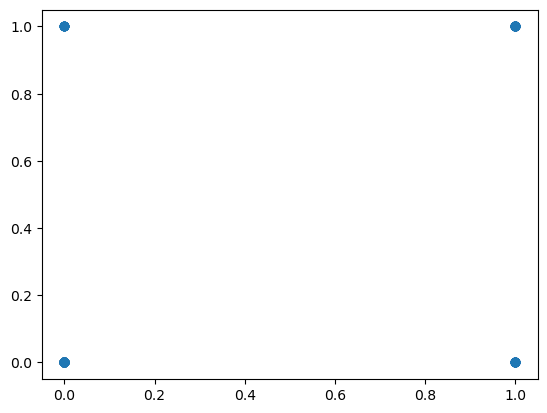

In [23]:
plt.scatter(y_test , y_predict)

In [25]:
standarized_data=scaler.transform(x)

C:\Users\shrut\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
standarized_data

array([[-0.95180864, -3.7571036 , -3.56486115, ..., -4.03458073,
        -0.01022106, -2.70705751],
       [-1.39275404, -3.81881281, -3.58089709, ..., -4.14734019,
        -2.52764931, -2.8446161 ],
       [-0.77543048, -3.7228207 , -3.58624241, ..., -4.20049822,
         0.40022919, -2.83737617],
       ...,
       [-1.03999772, -3.78355041, -3.56486115, ..., -4.15378359,
        -3.49448769, -2.85185602],
       [-1.39275404, -3.77865285, -3.59693304, ..., -4.09096046,
        -2.54589154, -2.72877728],
       [-1.39275404, -3.81097672, -3.57020646, ..., -4.08612791,
        -2.85600951, -2.9025355 ]])

In [33]:
#model predicting
input_data=(1,103,30,38,83,43.3,0.183,33)
input_data_np=np.asarray(input_data)
input_data_reshape=input_data_np.reshape(1,-1)
#standrized the inpiut data 
std_data = scaler.transform(input_data_reshape)

prediction = algo.predict(std_data)

print(prediction)
if(prediction[0]==1):
    print("diabatic pateint")
else:
    print("non diabatic")

[0]
non diabatic


C:\Users\shrut\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
